# 9.4-2 (using custom functions)

The Wirehouse Lumber Company will soon begin logging eight groves of trees in the same general area. Therefore, it must develop a system of dirt roads that makes each grove accessible from every other grove. The distance (in miles) between every pair of groves is as follows: 
<br>
<br>

<div>
<img src="img_9.4-2_table.png" width="400"/>
</div>

Management now wishes to determine between which pairs of groves the roads should be constructed to connect all groves with a minimum total length of road.<br>

(a) Describe how this problem fits the network description of the minimum spanning tree problem. <br>
(b) Use the algorithm described in Sec. 9.4 to solve the problem.


In [1]:
import pandas as pd

In [2]:
# initialize data
df = pd.read_csv('data_arc.csv')
df.head()

,u,v,distance
0,1,1,0.0
1,2,1,1.3
2,3,1,2.1
3,4,1,0.9
4,5,1,0.7


In [3]:
# remove any rows that are not connected
df = df[df['distance']!=0]
df.head()

,u,v,distance
1,2,1,1.3
2,3,1,2.1
3,4,1,0.9
4,5,1,0.7
5,6,1,1.8


In [4]:
# create set of vertices
nodes = set(df['u'])
nodes

{1, 2, 3, 4, 5, 6, 7, 8}

In [5]:
# create list of arc tuples
arcs = list((t[1], t[2]) for t in df.itertuples())
arcs[:10]

[(2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (1, 2),
 (3, 2),
 (4, 2)]

In [99]:
distance_dict = dict([((t[1], t[2]), t.distance) for t in df.itertuples()])


In [98]:
def create_neighbor_dict(unconnected_nodes, connected_nodes):
    neighbor_dict ={}
    for i in connected_nodes:
        for j in unconnected_nodes:
            try: 
                distance = distance_dict[i,j]
            except:
                pass
            neighbor_dict.update({(i,j):distance})
    return neighbor_dict

In [16]:
# check
connected_nodes = [1,4]
create_neighbor_dict2(unconnected_nodes, connected_nodes)
    

{(1, 2): 1.3,
 (1, 3): 1.3,
 (1, 4): 0.9,
 (1, 5): 0.7,
 (1, 6): 1.8,
 (1, 7): 2.0,
 (1, 8): 1.5,
 (4, 2): 1.8,
 (4, 3): 2.6,
 (4, 4): 2.6,
 (4, 5): 0.7,
 (4, 6): 1.6,
 (4, 7): 1.5,
 (4, 8): 0.9}

In [100]:
def find_nearest_neighbor_edge(unconnected_nodes, connected_nodes):
    neighbor_dict = create_neighbor_dict(unconnected_nodes, connected_nodes)
    min_key = min(neighbor_dict, key=neighbor_dict.get)
    return min_key

In [101]:
# check 
find_nearest_neighbor_edge(unconnected_nodes, connected_nodes)

(1, 5)

In [102]:
def find_nearest_neighbor(unconnected_nodes, connected_nodes):
    neighbor_dict = create_neighbor_dict(unconnected_nodes, connected_nodes)
    min_key = min(neighbor_dict, key=neighbor_dict.get)
    return  min_key[1]

In [103]:
find_nearest_neighbor(unconnected_nodes, connected_nodes)

5

## Main logic

In [120]:
# initialize data
unconnected_nodes = list(nodes)
connected_nodes =[]
distance_lst =[]
total_distance = 0
edges =[]

# set a starting node
j = unconnected_nodes[0]
connected_nodes.append(j)
unconnected_nodes.remove(j)

while len(unconnected_nodes) != 0:

    # find the minimum distance for nodes from nodes that are connected to nodes that are not
    edge_soln = find_nearest_neighbor_edge(unconnected_nodes, connected_nodes)
    edge_distance = distance_dict[edge_soln]
    j = edge_soln[1]

    # update trackers
    distance_lst.append(edge_distance)
    total_distance = total_distance + edge_distance
    edges.append(edge_soln)
    unconnected_nodes.remove(j)
    connected_nodes.append(j)

total_distance = round(total_distance,4)
node_1 = [i[0] for i in edges]
node_2 = [i[1] for i in edges]


In [121]:
print('total_distance: ', total_distance)
print('edges: ', edges)
print('distance_lst: ', distance_lst)
print('unconnected_nodes: ', unconnected_nodes)
print('connected_nodes: ', connected_nodes)

total_distance:  5.2
edges:  [(1, 5), (5, 4), (5, 8), (8, 7), (7, 6), (8, 3), (3, 2)]
distance_lst:  [0.7, 0.7, 0.8, 0.5, 0.6, 1.0, 0.9]
unconnected_nodes:  []
connected_nodes:  [1, 5, 4, 8, 7, 6, 3, 2]


In [122]:
output_df = pd.DataFrame(
    {'node_1': node_1,
     'node_2': node_2,
     'distance': distance_lst
    })
output_df


,node_1,node_2,distance
0,1,5,0.7
1,5,4,0.7
2,5,8,0.8
3,8,7,0.5
4,7,6,0.6
5,8,3,1.0
6,3,2,0.9


In [124]:
total_distance

5.2

# Plot results

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import tree

In [126]:
arcs = list((t[1], t[2]) for t in df.itertuples())
distance_dict = dict([((t[1], t[2]), t.distance) for t in df.itertuples()])

G = nx.Graph()

for x in arcs:
    i = x[0]
    j = x[1]
    weight = distance_dict[i,j]
    G.add_edge(i,j,weight = weight)


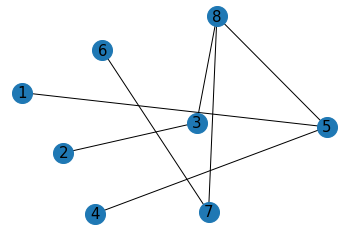

In [127]:
pos = nx.spring_layout(G) 
nx.draw_networkx_nodes(G, pos, node_size=400)
nx.draw_networkx_edges(G, pos, edgelist=edges,width=1)
nx.draw_networkx_labels(G, pos, font_size=15, font_family='sans-serif')

plt.axis('off')
plt.show()

# Full print out of logic

In [ ]:
# # initalize
# unconnected_nodes = list(nodes)
# connected_nodes =[]
# j = unconnected_nodes.pop()
# total_distance = 0
# edges =[]

# while len(unconnected_nodes) != 0:
    
#     # current network before evaluation
#     i = j
#     print('current network before evaluation')
#     print('starting node:',i)
#     print('unconnected_nodes: ',unconnected_nodes)
#     print('connected_nodes: ',connected_nodes)
#     print('************************************************************')
    
    
#     # find the nearest neighbor to i (and next node)
#     j = find_nearest_neighbor(i)
#     print('find the nearest neighbor to i')    
#     print("nearest neighbor:",j)
#     print('************************************************************')
    
    
#     distance_ij = find_nearest_neighbor_distance(i)
#     print('find the distance to nearest neighbor') 
#     print("distance to nearest neighbor:", distance_ij)
#     print('************************************************************')
    
    
#     soln_edge = find_nearest_neighbor_edge(i)
#     print('update solution (edges list)')
#     print('edges: ', soln_edge)
#     print('************************************************************')
    
    
#     # update trackers
#     total_distance = total_distance +find_nearest_neighbor_distance(i)
#     print('update solution (total distance)') 
#     print('total_distance:', total_distance)
#     print('************************************************************')
    
    
#     edges.append(soln_edge)
#     print('update solution (edges list)')
#     print('edges: ', edges)
#     print('************************************************************')
    
#     connected_nodes.append(j)
#     unconnected_nodes.remove(j)
#     print('move the nearest neighbor, j, from unconnected list to the connected list')
#     print('unconnected_nodes:',unconnected_nodes)
#     print('connected_nodes:',connected_nodes)
#     print('************************************************************')

 
#     print()
#     print()
#     print('************************************************************')
#     print('Next node')
#     print('************************************************************')
#     print()
#     print()

    

